# Map for BOD showing NMFS areas and locations

Author: Johanna L K Wren

Email:  johanna.wren@noaa.gov

Date:   April 19, 2021


## Description
This map is a request by Becky and the BOD to update an existing map with locations of all NMFS Science Centers, Regional Offices, and laboratories, as well as Council Management Areas and LME's. 


In [1]:
import pygmt
import geopandas as gpd
import pandas as pd
import rasterio as rio
import rioxarray as rxr
from pathlib import Path
import matplotlib.pyplot as plt

## Read in shapefiles
Using shapefiles for management regions (msa's) provided by Becky and LEM's that I found online.

All shapefiles are in +-180 but GMT handles that nicely so no need to do anything. 

In [2]:
# Management regions
msa = gpd.read_file('MSA_split/MSA_all_councils.shp')

# Large marine ecosystems
lme = gpd.read_file('LME66/LMEs66.shp')

<AxesSubplot:>

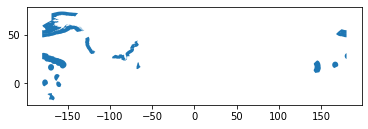

In [3]:
msa.plot()

## Convert shapefiles to gmt
The 'easiest' way I found to do this was to take the shapefile and convert it to a GMT/OGR file, then reading that file in for the mapping. 

In [5]:
# Convert msa file
msa.to_file('msa.gmt', driver='OGR_GMT')

# Convert lme file
lme.to_file('lme.gmt', driver='OGR_GMT')

## Read in locations
We have the locations of the science centers, regional offices, and labs in a csv file. Each location is tagged wtih what it is so we can sort on that. 

In [6]:
# Read in CSV file
sites = pd.read_csv('NOAA_locations_MPS.csv')

# Subset into each type of location
sc = sites[sites['Type']=='SC']
ro = sites[sites['Type']=='RO']
lab = sites[sites['Type']=='Lab']
ss = sites[sites['Type']=='SS']

## Make plot
Using pyGMT here and it's suprisingly easy using shapefiles (converted to gmt) and it plots quick! I'm very impressed with this package. There is good documetation available and it's constantly improving, so an excellent experience so far. The syntax is pretty close to GMT so it's not too difficult to guess how to change the pen, colors etc. 

Makine a Robinson projection (and a Mercator in case) showing the Pacific Ocean including all the territories, management areas etc. 

Using gray land and light blue ocean with darker blue MSAs and LMEs marked with dark lines. The locaitons have different symbols depening on what type it is (science center, regional office, etc.)

Saving as an .eps file so I can add a legend and labels in Illustrator. 

In [7]:
# Define extent of map
nmfs = [140, 300, -20, 75]

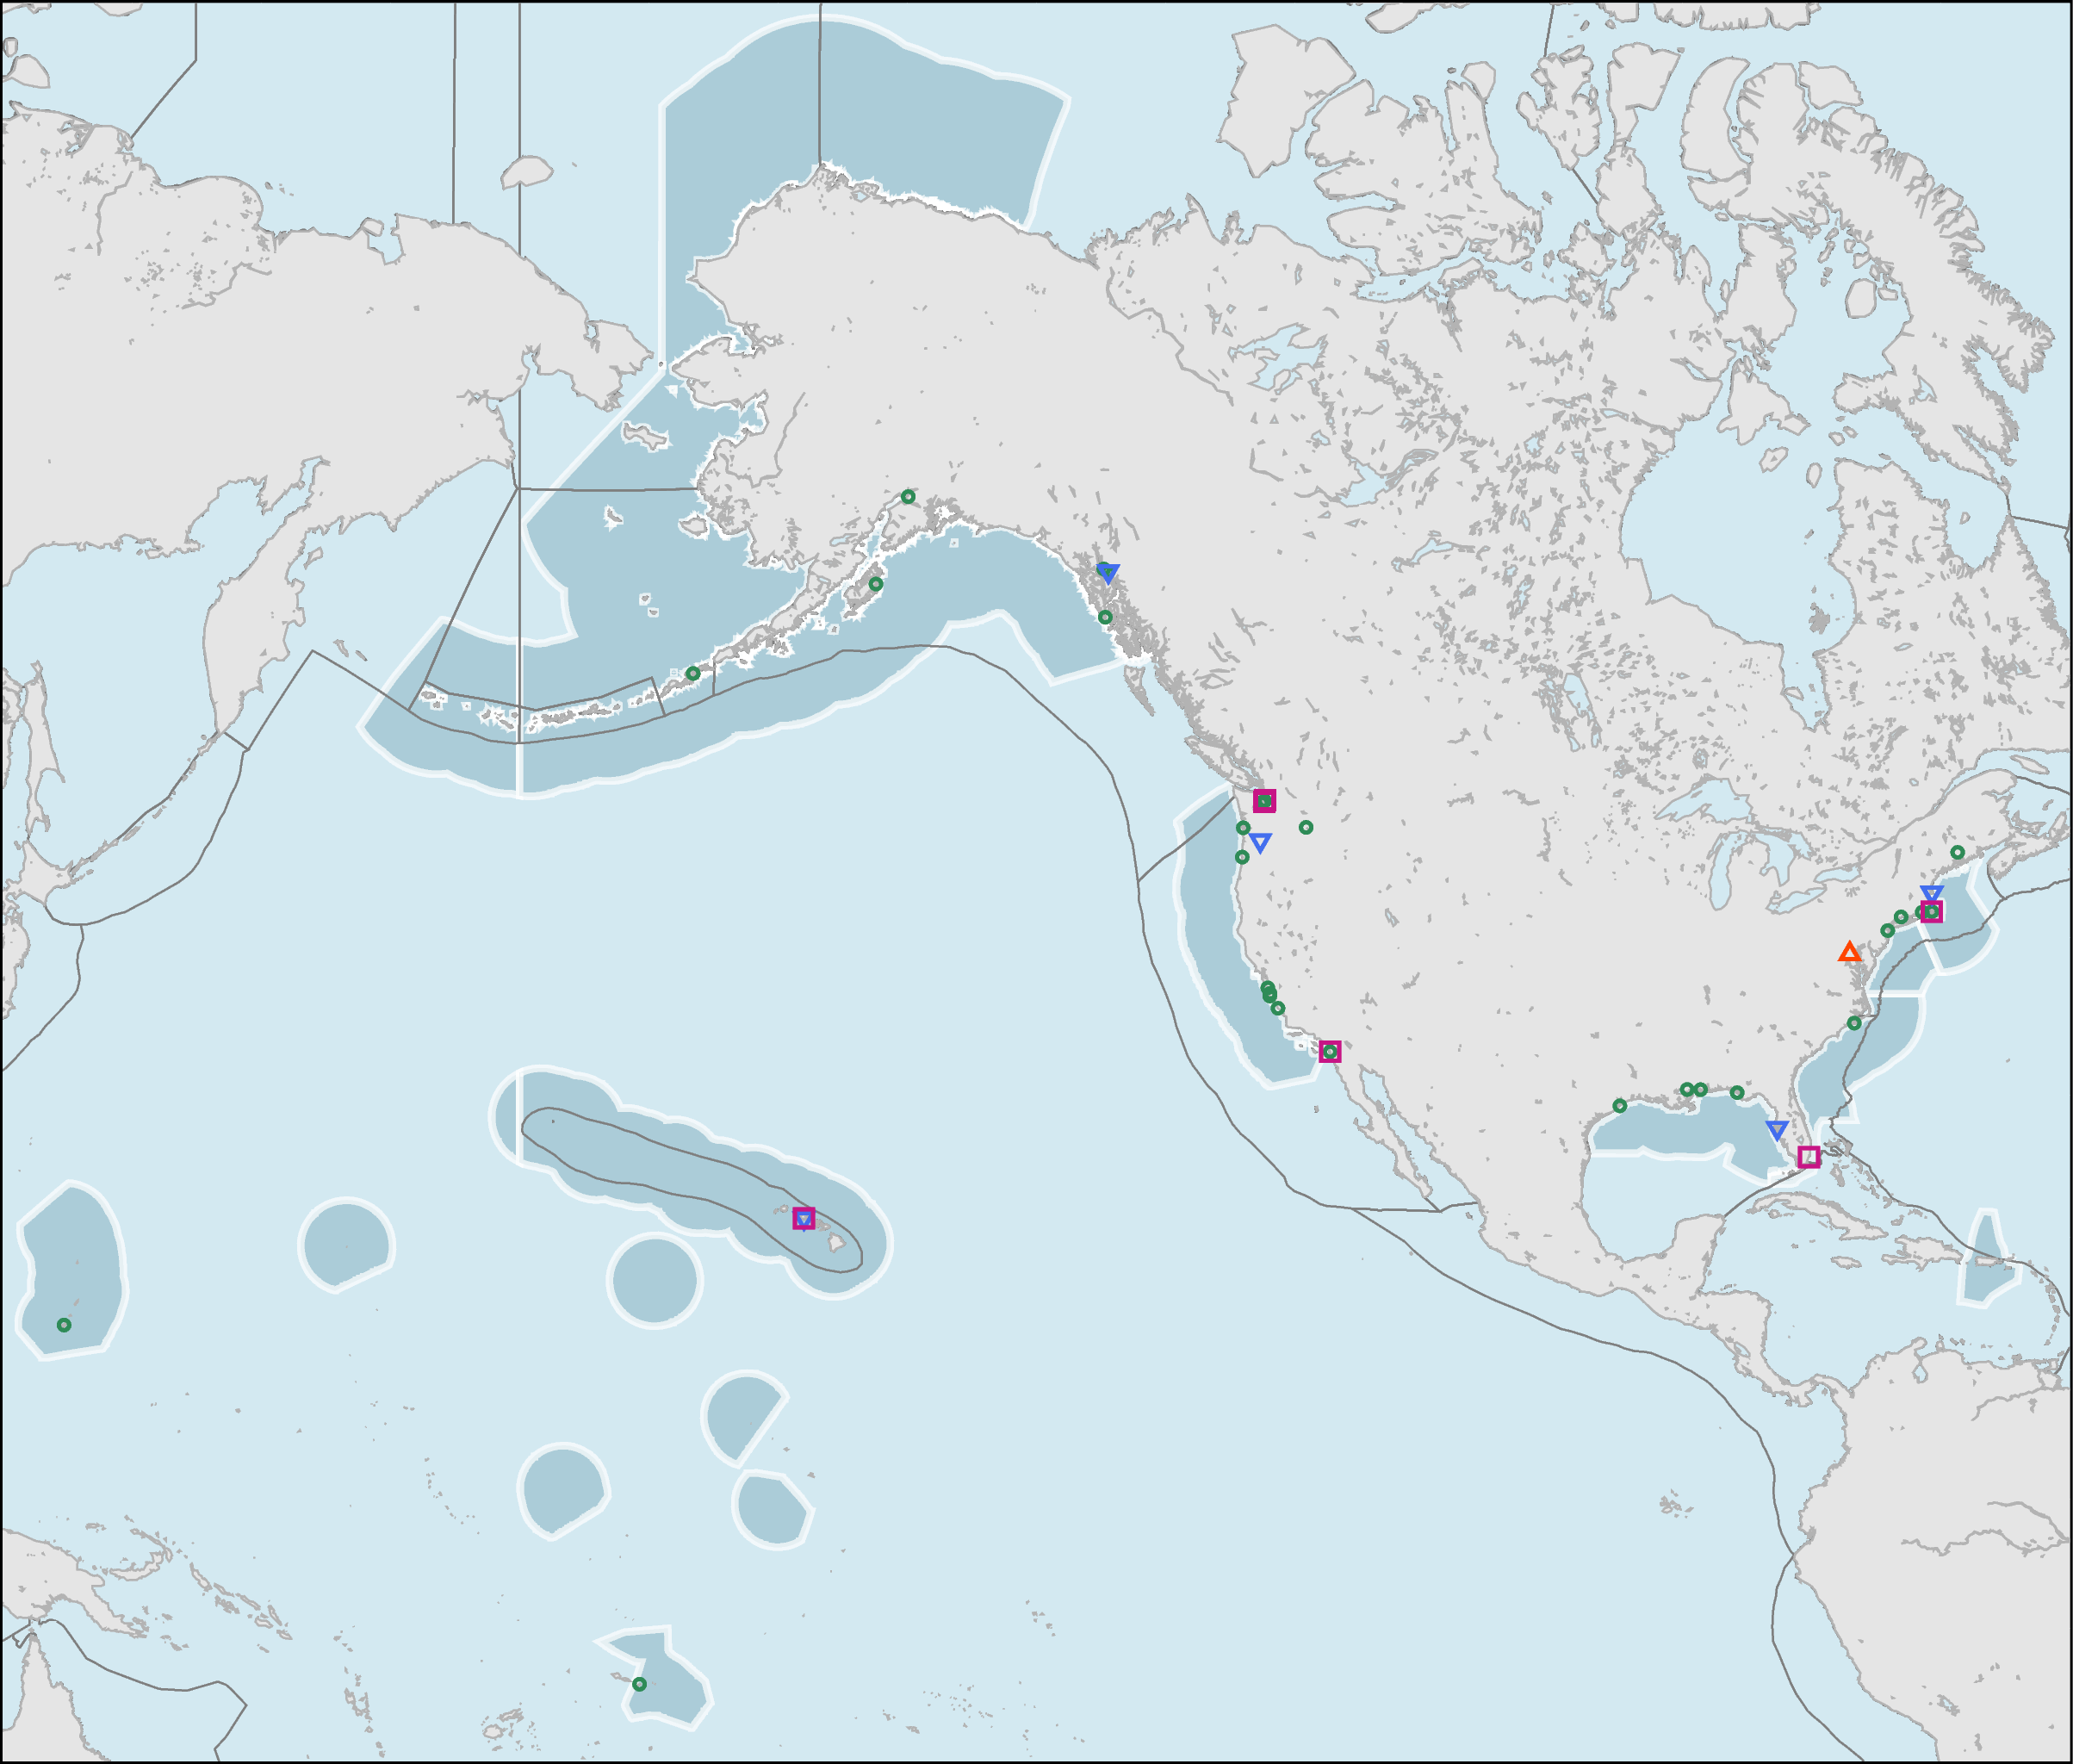

In [8]:
# Make the figure
fig = pygmt.Figure()
with pygmt.config(MAP_FRAME_TYPE="plain"):        # This sets the map frame to plain for this figure only
    fig.basemap(region=nmfs, projection='M8i', frame='nsew')
fig.coast(region=nmfs, water='#D3E9F1', d='c')     #D3E9F1 #E0EFF5
fig.plot(region=nmfs, data='msa.gmt', color='lightblue3', t=30, pen='2p,white')
fig.plot(region=nmfs, data='lme.gmt', pen='0.5p,gray50')
fig.coast(region=nmfs, land='gray90', shorelines="0.5p,gray70", d='c')
fig.plot(x=lab.Lon, y=lab.Lat, style="c0.1c", pen="1.1p,seagreen4")
fig.plot(x=ro.Lon, y=ro.Lat, style="i0.2c", pen="1.1p,royalblue2")
fig.plot(x=sc.Lon, y=sc.Lat, style="s0.25c", pen="1.1p,mediumvioletred")
fig.plot(x=ss.Lon, y=ss.Lat, style="t0.2c", pen="1.1p,orangered")
fig.set_panel()
fig.show()
#fig.savefig('test.eps')